### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.

### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [301]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.offline as pxo
pxo.init_notebook_mode()

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [302]:
data = pd.read_csv('data/coupons.csv')

In [303]:
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

2. Investigate the dataset for missing or problematic data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

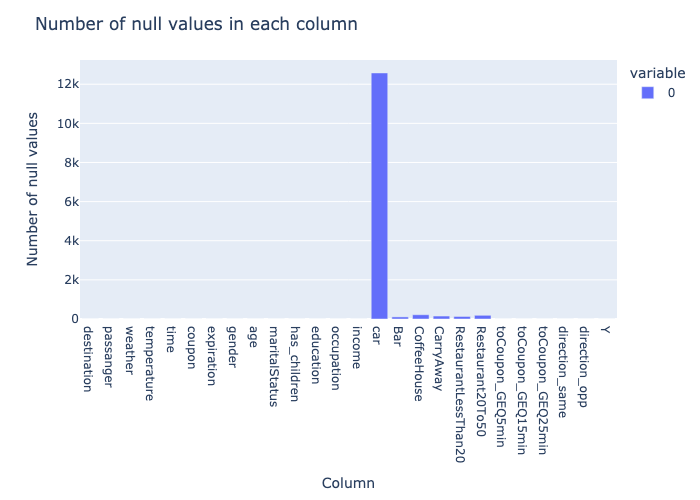

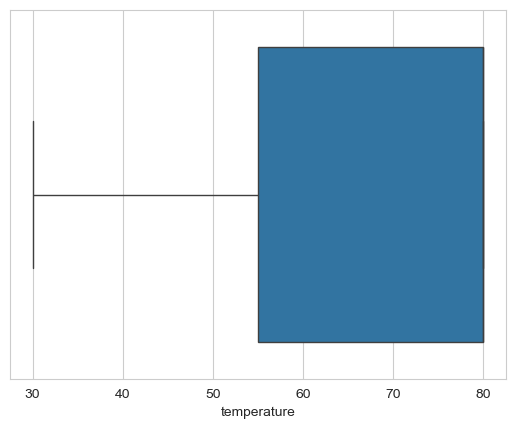

['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


In [304]:
data.describe()
data.info()

#Checking missing values
missing_values = data.isnull().sum()
print(missing_values)

#Checking duplicate data
duplicates = data.duplicated().sum()
print(f'Duplicates: {duplicates}')

#checking outliers
import seaborn as sns
import matplotlib.pyplot as plt

#plot graph showing all columns with number of null values and show legend
fig = px.bar(data.isnull().sum())
fig.update_layout(title='Number of null values in each column', xaxis_title='Column', yaxis_title='Number of null values')
fig.show('png')

sns.boxplot(x=data['temperature'])
plt.show()

#checking inconsistencies in categorical columns.
unique_values = data['coupon'].unique()
print(unique_values)


3. Decide what to do about your missing data -- drop, replace, other...

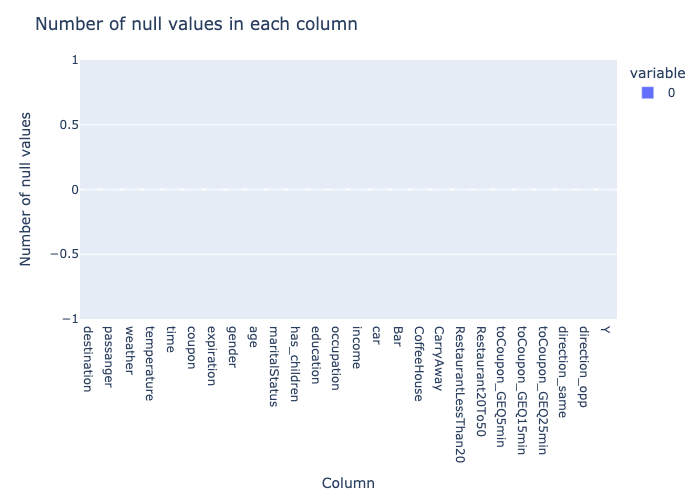

In [305]:
# Create a clone of the data which can be used for cleaning
cleaned_data = data.copy()

#To Drop duplicates
cleaned_data.drop_duplicates(inplace=True)

# Standardize text data to lowercase
cleaned_data['coupon'] = cleaned_data['coupon'].str.lower()

#Fill missing values with the mode for categorical columns
cleaned_data.fillna(cleaned_data.mode().iloc[0], inplace=True)

# verify no null values are present visually
fig = px.bar(cleaned_data.isnull().sum())
fig.update_layout(title='Number of null values in each column', xaxis_title='Column', yaxis_title='Number of null values')
fig.show('png')

4. What proportion of the total observations chose to accept the coupon?



Proportion of accepted coupons: 0.57


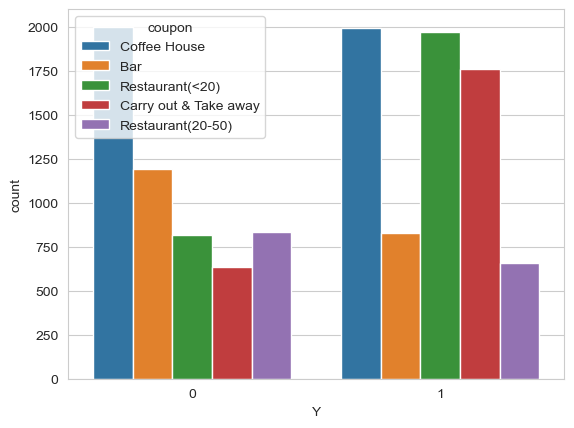

In [306]:
#Count the total number of observations in the dataset.
total_observations = cleaned_data.shape[0]

#Filter the dataset where Y = 1 (accepted) and count those observations.
accepted_coupons = cleaned_data[cleaned_data['Y'] == 1].shape[0]

proportion_accepted = accepted_coupons / total_observations
print(f"Proportion of accepted coupons: {proportion_accepted:.2f}")

# visualize proportion of Y column with coupon column with seaborn
sns.countplot(x='Y', hue='coupon', data=data)
plt.show()

5. Use a bar plot to visualize the `coupon` column.

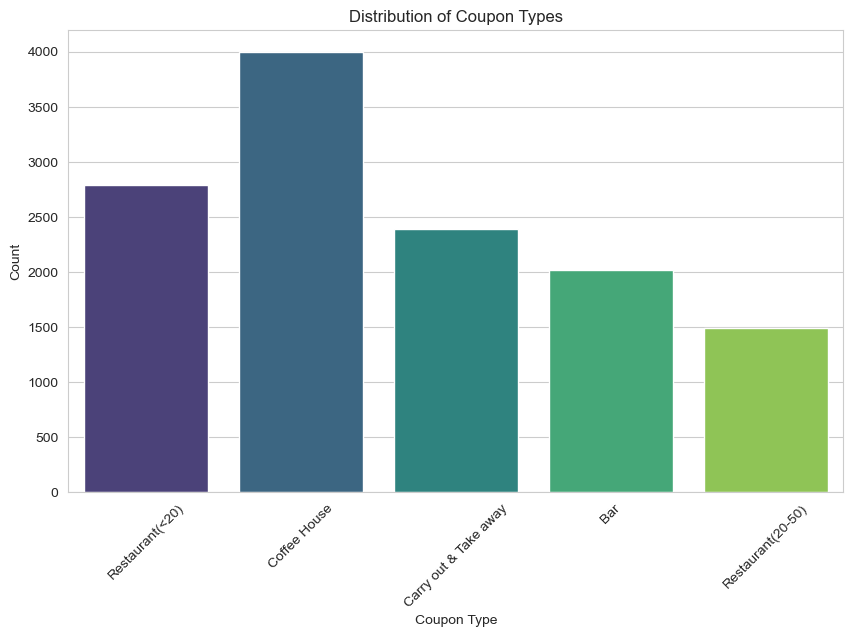

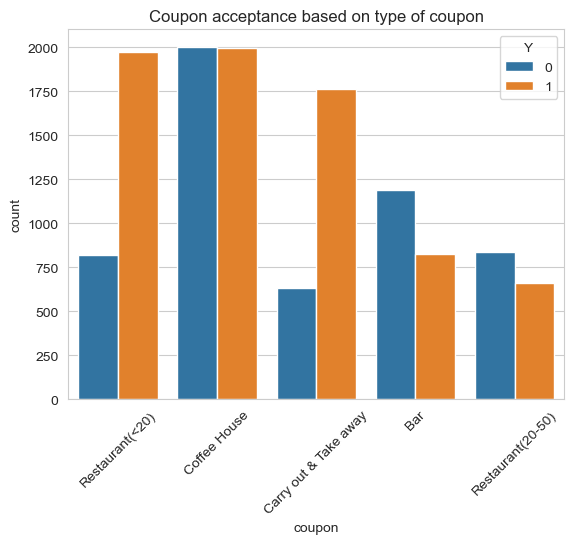

In [307]:
# Count the occurrences of each coupon type
coupon_counts = cleaned_data['coupon'].value_counts()

# Create a bar plot

# Set the style of the plot
sns.set_style("whitegrid")

# Create a count plot for the 'coupon' column
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='coupon',hue='coupon', palette='viridis')

# Add titles and labels
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)
plt.show()

# visualize the distribution of Y column using a histogram plot with seaborn with legend and x-axis label tilted at 45 degrees
sns.countplot(data=data, x='coupon', hue='Y')
plt.title('Coupon acceptance based on type of coupon')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

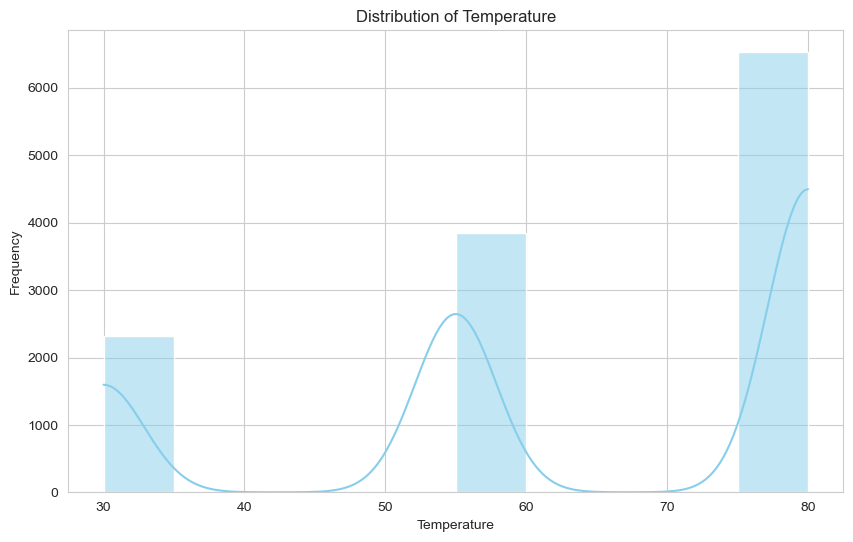

In [308]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a histogram for the 'temperature' column
plt.figure(figsize=(10, 6))
sns.histplot(data['temperature'], bins=10, kde=True, color='skyblue')

# Add titles and labels
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [309]:
# Create a scatter plot for coupon acceptance based on temperature
fig = px.scatter(data, x='temperature', y='coupon', color='Y',
                 title='Coupon Acceptance Based on Temperature',
                 labels={'Y': 'Accepted', 'temperature': 'Temperature', 'coupon': 'Coupon Type'})

# Show the plot
fig.show()

# answer: There is a positive correlation between temperature and Y column, meaning more the temperature, more the number of people who will buy the coupon

In [310]:
# Filter data for accepted coupons
accepted_coupons = cleaned_data[cleaned_data['Y'] == 1]

# Create a stacked bar chart
fig = px.histogram(
    accepted_coupons,
    x='coupon',
    color='passanger',
    barmode='stack',
    title='Accepted Coupons by Type and Passenger',
    labels={'coupon': 'Coupon Type', 'passanger': 'Passenger Type'}
)

# Show the plot
fig.show()

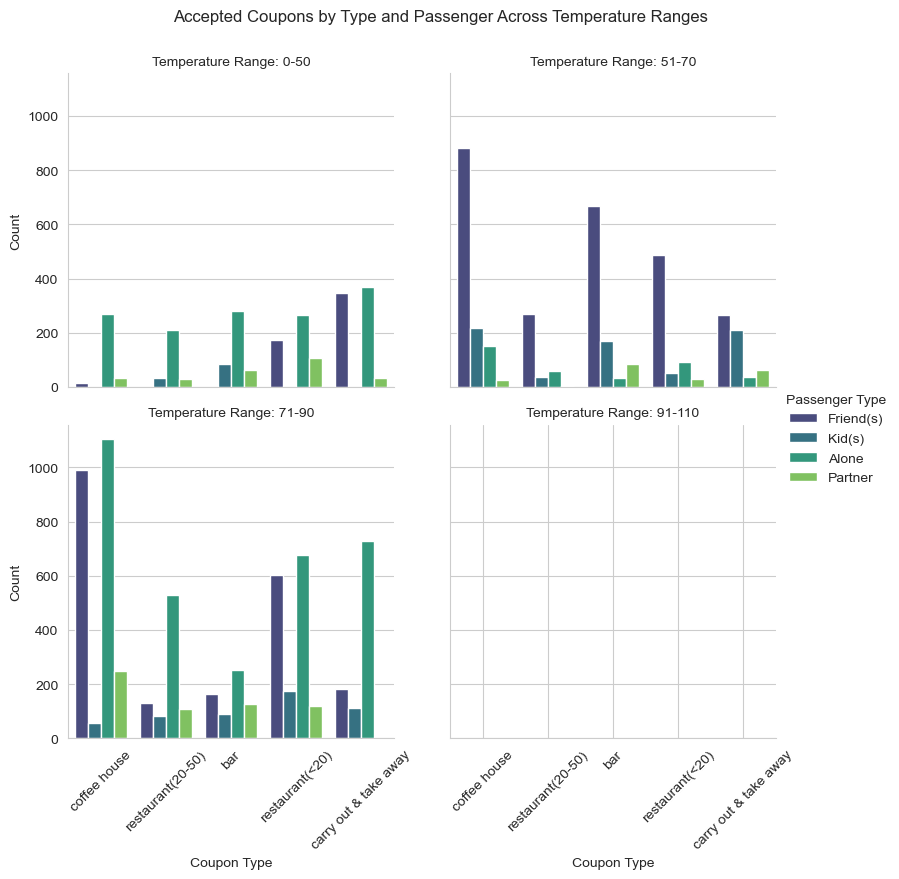

In [311]:
# Create a new column for temperature ranges
cleaned_data['temp_range'] = pd.cut(data['temperature'], bins=[0, 50, 70, 90, 110], labels=['0-50', '51-70', '71-90', '91-110'])

# Create a FacetGrid
g = sns.FacetGrid(cleaned_data, col='temp_range', col_wrap=2, height=4)
g.map_dataframe(sns.countplot, x='coupon', hue='passanger', palette='viridis')

# Add titles and adjust layout
g.set_titles(col_template="Temperature Range: {col_name}")
g.set_axis_labels("Coupon Type", "Count")
g.add_legend(title="Passenger Type")

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Accepted Coupons by Type and Passenger Across Temperature Ranges')

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [312]:
# create data frame with only data which has coupon column as 'Bar'
bar_data = cleaned_data[cleaned_data['coupon'] == 'bar']
# drop rows with unknown values in Bar column
# bar_data = bar_data[bar_data['Bar'] != 'unknown']
bar_data

destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    bar   
13                Home      Alone   Sunny           55   6PM    bar   
17                Work      Alone   Sunny           55   7AM    bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    bar   
35                Home      Alone   Sunny           55   6PM    bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    bar   
12682             Work      Alone   Snowy           30   7AM    bar   

      expiration  gender age      maritalStatus  ...  CarryAway  \
9             1d  Female  21  Unmarried partner  ...        1~3   
13            1d  Female  21  Unmarried partner  ...        1~3   
17            1d  Female  21  Unmarried partner  ...        1~3   
24            1d    Male  21             Single  ...        4~8   
35            1d    Male  21             Single  ...        4~8   
...          ...     ...  ..                ...  ...        ...   
12663         1d    Male  26             Single  ...        1~3   
12664         2h    Male  26             Single  ...        1~3   
12667         1d    Male  26             Single  ...        1~3   
12670         2h    Male  26             Single  ...        1~3   
12682         1d    Male  26             Single  ...        1~3   

      RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min  \
9                      4~8              1~3                1   
13                     4~8              1~3                1   
17                     4~8              1~3                1   
24                     4~8            less1                1   
35                     4~8            less1                1   
...                    ...              ...              ...   
12663                  4~8              1~3                1   
12664                  4~8              1~3                1   
12667                  4~8              1~3                1   
12670                  4~8              1~3                1   
12682                  4~8              1~3                1   

      toCoupon_GEQ15min toCoupon_GEQ25min direction_same direction_opp  Y  \
9                     1                 0              0             1  0   
13                    0                 0              1             0  1   
17                    1                 1              0             1  0   
24                    0                 0              0             1  1   
35                    0                 0              1             0  1   
...                 ...               ...            ...           ... ..   
12663                 1                 0              0             1  0   
12664                 1                 0              0             1  0   
12667                 1                 0              0             1  0   
12670                 1                 0              0             1  0   
12682                 1                 1              0             1  0   

      temp_range  
9          71-90  
13         51-70  
17         51-70  
24         71-90  
35         51-70  
...          ...  
12663      71-90  
12664      51-70  
12667      51-70  
12670      51-70  
12682       0-50  

[2010 rows x 27 columns]

In [313]:
# create bar_visits column with age as integer value from Bar column

# Dictionary for replacements
replacements = {
    'never': '0~0',
    'less1': '1~1',
    'gt8': '9~9',
    'unknown': '-1~-1'
}

# Create bar_visits column with age as integer value from Bar column
bar_data.loc[:, 'bar_visits'] = bar_data['Bar']

# Replace string values with integer values
bar_data.loc[:, 'bar_visits'] = bar_data['bar_visits'].replace(replacements)

# Extract the integer value
bar_data.loc[:, 'bar_visits'] = bar_data['bar_visits'].apply(lambda x: x.split('~')[1])

# Convert to integer
bar_data.loc[:, 'bar_visits'] = bar_data['bar_visits'].astype(int)

# Check value counts
print(bar_data['bar_visits'].value_counts())

bar_visits
0    851
1    563
3    397
8    150
9     49
Name: count, dtype: int64


/var/folders/0w/s7hn2l2n3p5_5d_yhdg0qmdc0000gn/T/ipykernel_88358/1199786641.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2. What proportion of bar coupons were accepted?


Proportion of accepted bar coupons: 0.41


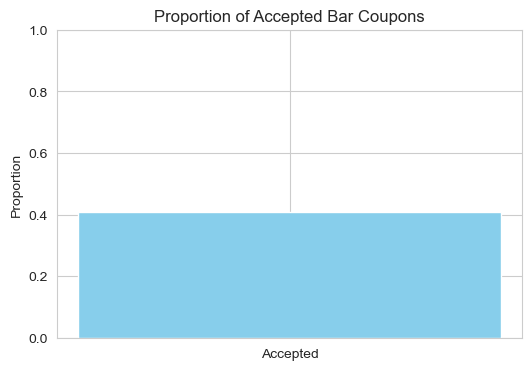

Y
0    0.59005
1    0.40995
Name: proportion, dtype: float64


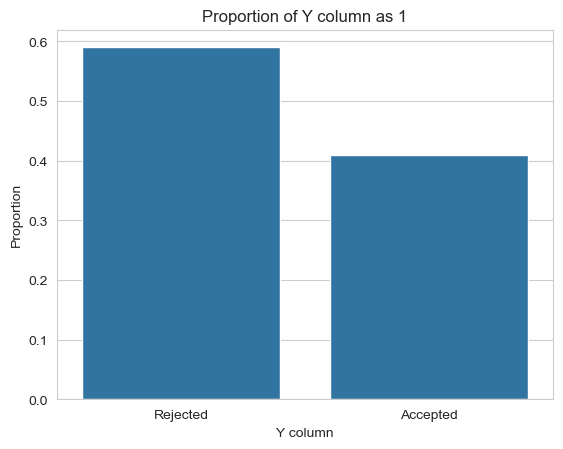

In [314]:
#bar_coupon_proportion = Total number of bar coupon accepted /Total number of bar coupon
proportion_accepted = bar_data[bar_data['Y']== 1].shape[0]/bar_data.shape[0]
print(f"Proportion of accepted bar coupons: {proportion_accepted:.2f}")

# Create a bar plot for the proportion of accepted bar coupons
plt.figure(figsize=(6, 4))
plt.bar(['Accepted'], [proportion_accepted], color='skyblue')

# Add titles and labels
plt.title('Proportion of Accepted Bar Coupons')
plt.ylabel('Proportion')

# Show the plot
plt.ylim(0, 1)
plt.show()

# what proportion of the data has Y column as 1
print(bar_data['Y'].value_counts(normalize=True))

#print bar chart for list of values update x axis lable and title in seaborn
sns.barplot(x=bar_data['Y'].value_counts(normalize=True).index, y=bar_data['Y'].value_counts(normalize=True).values)
plt.title('Proportion of Y column as 1')
plt.xlabel('Y column')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Rejected', 'Accepted'])
plt.show()

2.2. Answer: 0.4103 or 41.03% of the data has Y column as 1
which means around 41% of the people accepted the coupon "Bar"

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


['never' 'less1' '1~3' 'gt8' nan '4~8']


/var/folders/0w/s7hn2l2n3p5_5d_yhdg0qmdc0000gn/T/ipykernel_88358/2556633841.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



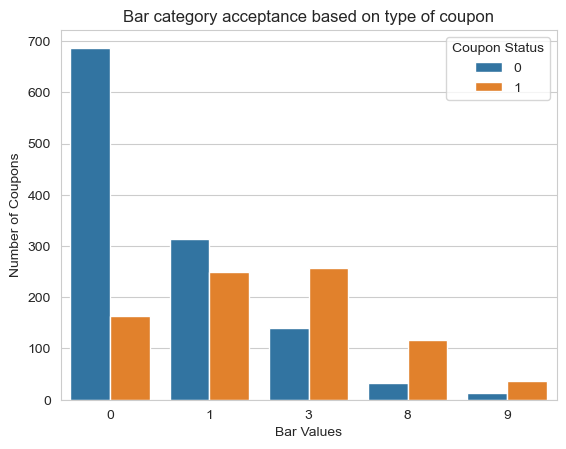

Acceptance Rate (3 or Fewer): 37.05%
Acceptance Rate (More than 3): 76.88%
Percentage Difference: 107.51%


/var/folders/0w/s7hn2l2n3p5_5d_yhdg0qmdc0000gn/T/ipykernel_88358/2556633841.py:57: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




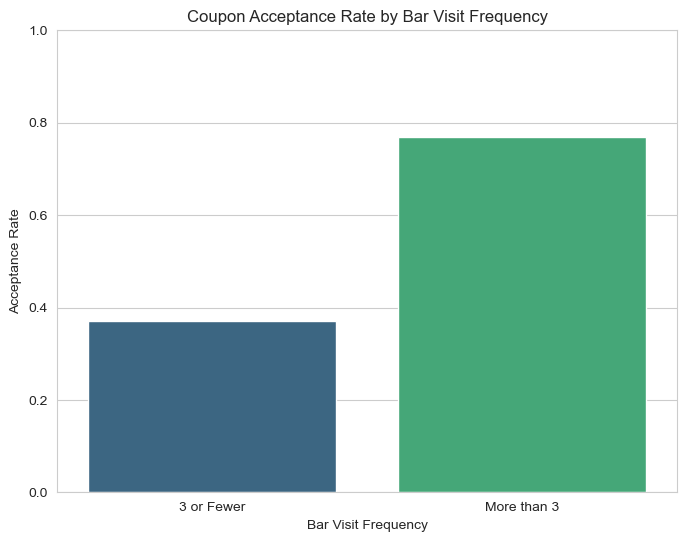

In [315]:
# Display unique values in 'Bar' column
unique_bar_values = data['Bar'].unique()
print(unique_bar_values)

# Replace string values with integer values using .loc
bar_data.loc[bar_data['bar_visits'] == 'never', 'bar_visits'] = 0
bar_data.loc[bar_data['bar_visits'] == 'less1', 'bar_visits'] = 1
bar_data.loc[bar_data['bar_visits'] == 'gt8', 'bar_visits'] = 9
bar_data.loc[bar_data['bar_visits'] == 'unknown', 'bar_visits'] = -1

## Replace string values with integer values using .loc
bar_data.loc[bar_data['bar_visits'] == 'never', 'bar_visits'] = 0
bar_data.loc[bar_data['bar_visits'] == 'less1', 'bar_visits'] = 1
bar_data.loc[bar_data['bar_visits'] == 'gt8', 'bar_visits'] = 9
bar_data.loc[bar_data['bar_visits'] == 'unknown', 'bar_visits'] = -1

# Handle ranges like '1~3' by taking the first number
def convert_range_to_int(value):
    if isinstance(value, str) and '~' in value:
        return int(value.split('~')[0])
    return int(value)

# Apply conversion function
bar_data['bar_visits'] = bar_data['bar_visits'].apply(convert_range_to_int)

# Plot bar visits excluding unknowns
sns.countplot(data=bar_data.query("bar_visits != -1"), x='bar_visits', hue='Y')
plt.title('Bar category acceptance based on type of coupon')
plt.xlabel('Bar Values')
plt.ylabel('Number of Coupons')
plt.legend(title='Coupon Status')
plt.show()

# Filter data for bar visit frequency using .loc
less_than_3 = bar_data.loc[bar_data['Bar'].isin(['never', 'less1', '1~3'])]
more_than_3 = bar_data.loc[bar_data['Bar'].isin(['4~8', 'gt8'])]

# Calculate acceptance rates
acceptance_rate_less_than_3 = less_than_3['Y'].mean()
acceptance_rate_more_than_3 = more_than_3['Y'].mean()

# Create a DataFrame for plotting
acceptance_rates = pd.DataFrame({
    'Frequency': ['3 or Fewer', 'More than 3'],
    'Acceptance Rate': [acceptance_rate_less_than_3, acceptance_rate_more_than_3]
})

# Calculate percentage difference
percentage_difference = ((acceptance_rate_more_than_3 - acceptance_rate_less_than_3) / acceptance_rate_less_than_3) * 100

print(f"Acceptance Rate (3 or Fewer): {acceptance_rate_less_than_3:.2%}")
print(f"Acceptance Rate (More than 3): {acceptance_rate_more_than_3:.2%}")
print(f"Percentage Difference: {percentage_difference:.2f}%")

# Create a bar plot for acceptance rates
plt.figure(figsize=(8, 6))
sns.barplot(data=acceptance_rates, x='Frequency', y='Acceptance Rate', palette='viridis')

# Add titles and labels
plt.title('Coupon Acceptance Rate by Bar Visit Frequency')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')

# Show the plot
plt.ylim(0, 1)
plt.show()

The acceptance rate of the coupon is higher for people who have visited 4 or more bars (by 62.16%) than people who have visited 3 or less bars (by 56.07%)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [316]:
print(bar_data['age'].value_counts())

# Dictionary for replacements
replacements = {
    '50plus': '50',
    'below21': '20'
}

# Create age_int column with age as integer value from age column
bar_data.loc[:, 'age_int'] = bar_data['age']

# Replace string values with integer values
bar_data.loc[:, 'age_int'] = bar_data['age_int'].replace(replacements)

# Convert to integer
bar_data.loc[:, 'age_int'] = bar_data['age_int'].astype(int)

# Check value counts
print(bar_data['age_int'].value_counts())

age
21         417
26         395
31         336
50plus     283
36         209
41         178
46         105
below21     87
Name: count, dtype: int64
age_int
21    417
26    395
31    336
50    283
36    209
41    178
46    105
20     87
Name: count, dtype: int64


/var/folders/0w/s7hn2l2n3p5_5d_yhdg0qmdc0000gn/T/ipykernel_88358/2629595220.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [317]:
# find proportion of people who accepted the coupon for each age category and bar_visits > 1
filtered_data = bar_data[(bar_data['bar_visits'] != -1) & (bar_data['bar_visits'] <= 1) & (bar_data['age_int'] < 25)]

# Calculate the value counts
result = filtered_data['Y'].value_counts(normalize=True).sort_index()
print(result)

# Filter for age > 25 and bar_visits > 1
filtered_data_1 = bar_data[(bar_data['age_int'] > 25) & (bar_data['bar_visits'] > 1)].copy()
result1 = filtered_data_1['Y'].value_counts(normalize=True).sort_index()

# Filter for age < 25 and bar_visits < 1
filtered_data_2 = bar_data[(bar_data['age_int'] < 25) & ((bar_data['bar_visits'] < 1) | (bar_data['bar_visits'] <= 1))].copy()
result2 = filtered_data_2['Y'].value_counts(normalize=True).sort_index()


print("Bar visited greater than 1 + age > 25 :")
print(result1)

print("Bar visited less than 1 + age < 25 :")
print(result2)

# Bar visited greater than 1 + age > 25 :
# Y
# 0    0.38523
# 1    0.61477
# Name: proportion, dtype: float64

# Bar visited less than 1 + age < 25 :
# Y
# 0    0.419304
# 1    0.580696
# Name: proportion, dtype: float64

Y
0    0.606707
1    0.393293
Name: proportion, dtype: float64
Bar visited greater than 1 + age > 25 :
Y
0    0.304762
1    0.695238
Name: proportion, dtype: float64
Bar visited less than 1 + age < 25 :
Y
0    0.606707
1    0.393293
Name: proportion, dtype: float64


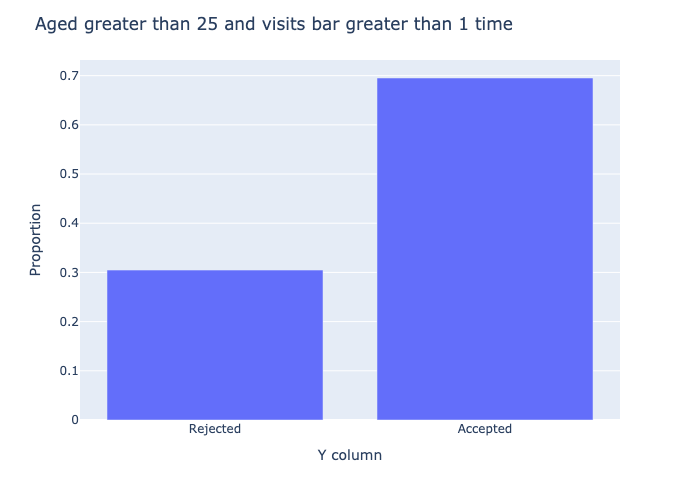

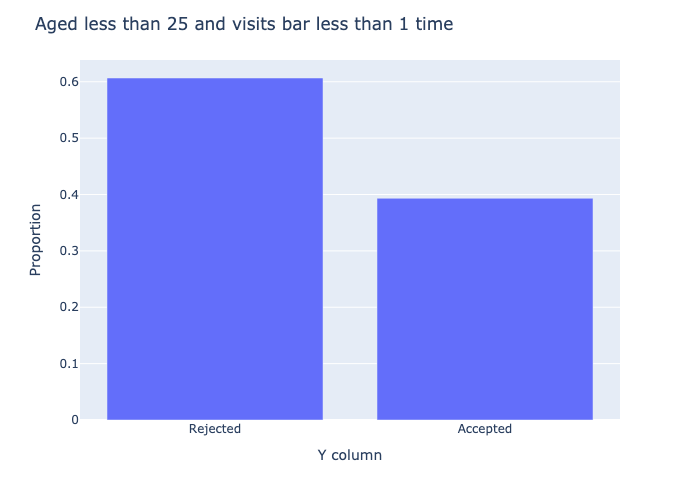

In [318]:
# # plot multi bar graph to show bar_values column only excludes rows with value 0 with Y column with legend and x-axis label tilted at 45 degrees with title and x-axis and y-axis labels
# # and title is 'Bar category acceptance based on type of coupon'
# # update Y column values to 'Accepted' and 'Rejected' instead of 1 and 0 in the legend
# # update x axis labels to 'Never had a bar', 'Had less than 1 bar', 'Had more than 1 bar'
# based on above values, we pick index with value 1 for both the above data frames because this represents coupon acceptance
# print bar chart for list of values update x axis lable and title in seaborn

fig = px.bar(y=bar_data.query('bar_visits > 1 and age_int>25')["Y"].value_counts(normalize=True).sort_index().values)
fig.update_layout(title_text='Aged greater than 25 and visits bar greater than 1 time', xaxis_title='Y column', yaxis_title='Proportion')
fig.update_xaxes(tickvals = [0, 1], ticktext=['Rejected', 'Accepted'])
fig.show('png')

fig = px.bar(y=bar_data.query('bar_visits != -1 and bar_visits <= 1 and age_int<25')["Y"].value_counts(normalize=True).sort_index().values)
fig.update_layout(title_text='Aged less than 25 and visits bar less than 1 time', xaxis_title='Y column', yaxis_title='Proportion')
fig.update_xaxes(tickvals = [0, 1], ticktext=['Rejected', 'Accepted'])
fig.show('png')

2.4. Answer: From graph it is clear that people who are aged 25+ and have visited a bar are more likely to accept the coupon than people who are aged less than 25 and have never visited a bar

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Drivers: bars>1 & passengers not in [kid, alone] & occupations != 'farming fishing or forestry':
Y
0    0.282051
1    0.717949
Name: proportion, dtype: float64
Otherwise:
Y
0    0.62314
1    0.37686
Name: proportion, dtype: float64
bar_question_5
0    0.902985
1    0.097015
Name: proportion, dtype: float64


/var/folders/0w/s7hn2l2n3p5_5d_yhdg0qmdc0000gn/T/ipykernel_88358/3180962306.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



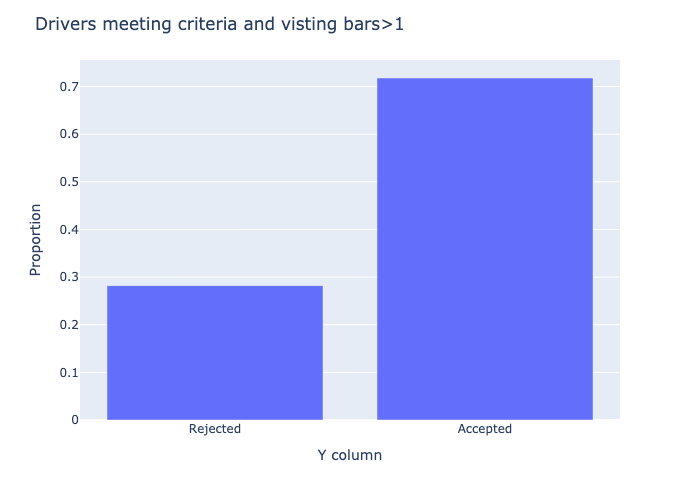

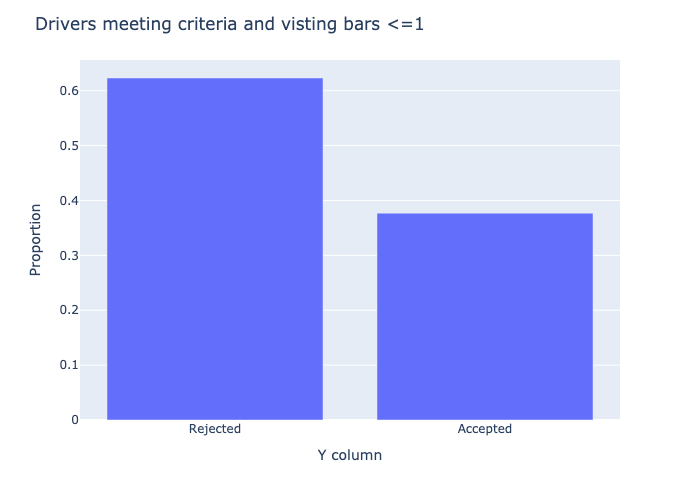

In [319]:
# create a new column 'bar_question_5' with :
# (1) value 1 if bar_visits value is greater than 1 and 'passanger' value is not one of the following: 'Kid(s)','Alone'
#  and 'occupation' is not "Farming Fishing & Forestry"
# (2) value 0 otherwise
# Filter data using .loc
# Create a new column 'bar_question_5' with specified conditions
bar_data['bar_question_5'] = np.where(
    (bar_data['bar_visits'] > 1) &
    (~bar_data['passanger'].isin(['Kid(s)', 'Alone'])) &
    (bar_data['occupation'] != 'Farming Fishing & Forestry'), 1, 0
)

# Find proportion of 'bar_question_5' for each value of Y column
print("Drivers: bars>1 & passengers not in [kid, alone] & occupations != 'farming fishing or forestry':")
print(bar_data.query('bar_question_5 == 1')["Y"].value_counts(normalize=True).sort_index())

print("Otherwise:")
print(bar_data.query('bar_question_5 == 0')["Y"].value_counts(normalize=True).sort_index())

# What proportion of the data has Y column as 1
print(bar_data['bar_question_5'].value_counts(normalize=True))

# Print bar chart for list of values update x axis label and title in seaborn
fig = px.bar(y=bar_data.query('bar_question_5 == 1')["Y"].value_counts(normalize=True).sort_index().values)
fig.update_layout(title_text='Drivers meeting criteria and visting bars>1',
                  xaxis_title='Y column', yaxis_title='Proportion')
fig.update_xaxes(tickvals=[0, 1], ticktext=['Rejected', 'Accepted'])
fig.show('png')

fig = px.bar(y=bar_data.query('bar_question_5 != 1')["Y"].value_counts(normalize=True).sort_index().values)
fig.update_layout(title_text='Drivers meeting criteria and visting bars <=1',
                  xaxis_title='Y column', yaxis_title='Proportion')
fig.update_xaxes(tickvals=[0, 1], ticktext=['Rejected', 'Accepted'])
fig.show('png')

2.5. Answer : drivers who have visited a bar more than once and are not alone with kids and are not in farming fishing or forestry occupation (which is 90% of bar visitor) are more likely to accept the coupon than drivers who do not meet the above criteria

6. Compare the acceptance rates between those drivers who:

- 6.1 go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*




/var/folders/0w/s7hn2l2n3p5_5d_yhdg0qmdc0000gn/T/ipykernel_88358/3277355104.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Drivers: bars>1 & passenger not in [kid, alone] & maritalStatus != 'Widowed'
Y
0    0.282051
1    0.717949
Name: proportion, dtype: float64
Criteria not matched:
Y
0    0.62314
1    0.37686
Name: proportion, dtype: float64


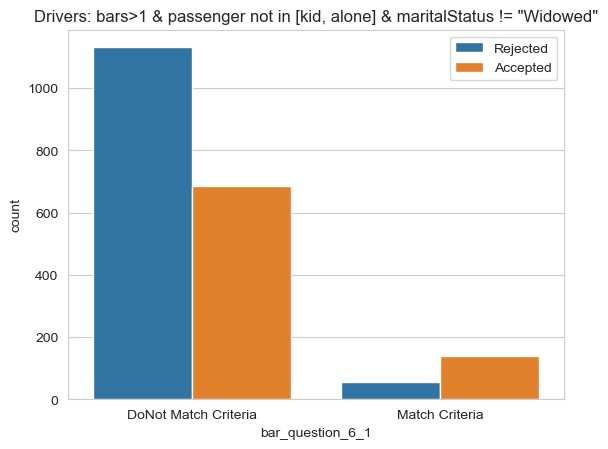

In [320]:
# Create 'bar_question_6_1' column for drivers who meet specific criteria
bar_data['bar_question_6_1'] = 0  # Initialize with 0
bar_data.loc[
    (bar_data['bar_visits'] > 1) &
    (~bar_data['passanger'].isin(['Kid(s)', 'Alone'])) &
    (bar_data['maritalStatus'] != 'Widowed'),
    'bar_question_6_1'
] = 1

# Display acceptance rates for 'bar_question_6_1'
print("Drivers: bars>1 & passenger not in [kid, alone] & maritalStatus != 'Widowed'")
print(bar_data.query('bar_question_6_1 == 1')["Y"].value_counts(normalize=True).sort_index())
print("Criteria not matched:")
print(bar_data.query('bar_question_6_1 == 0')["Y"].value_counts(normalize=True).sort_index())

# Plot acceptance rates for 'bar_question_6_1'
sns.countplot(data=bar_data, x='bar_question_6_1', hue='Y')
plt.title('Drivers: bars>1 & passenger not in [kid, alone] & maritalStatus != "Widowed"')
plt.xticks([0, 1], ['DoNot Match Criteria', 'Match Criteria'])
plt.legend(['Rejected', 'Accepted'])
plt.show()



- 6.2 go to bars more than once a month and are under the age of 30 *OR*

/var/folders/0w/s7hn2l2n3p5_5d_yhdg0qmdc0000gn/T/ipykernel_88358/3197757838.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0w/s7hn2l2n3p5_5d_yhdg0qmdc0000gn/T/ipykernel_88358/3197757838.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0w/s7hn2l2n3p5_5d_yhdg0qmdc0000gn/T/ipykernel_88358/3197757838.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Criteria matched:
Y
0    0.278261
1    0.721739
Name: proportion, dtype: float64
Criteria not matched:
Y
0    0.644718
1    0.355282
Name: proportion, dtype: float64


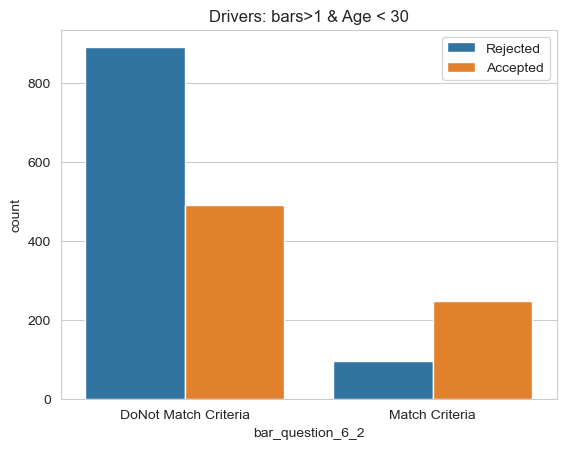

In [321]:
# Ensure 'age' is treated as a string before replacing text
bar_data['age'] = bar_data['age'].astype(str)

# Clean and convert age data to integers, handling non-finite values
bar_data['age'] = bar_data['age'].replace({'plus': '', 'below21': '20'})
bar_data['age'] = pd.to_numeric(bar_data['age'], errors='coerce')  # Convert to numeric, setting errors to NaN

# Drop rows with NaN in 'age' if needed
bar_data.dropna(subset=['age'], inplace=True)

# Convert age to integer after handling NaNs
bar_data['age_int'] = bar_data['age'].astype(int)

# Create 'bar_question_6_2' column for drivers under age 30 who visit bars more than once
bar_data['bar_question_6_2'] = 0  # Initialize with 0
bar_data.loc[
    (bar_data['bar_visits'] > 1) &
    (bar_data['age_int'] < 30),
    'bar_question_6_2'
] = 1

# Display acceptance rates for 'bar_question_6_2'
print("Criteria matched:")
print(bar_data.query('bar_question_6_2 == 1')["Y"].value_counts(normalize=True).sort_index())
print("Criteria not matched:")
print(bar_data.query('bar_question_6_2 == 0')["Y"].value_counts(normalize=True).sort_index())

# Plot acceptance rates for 'bar_question_6_2'
sns.countplot(data=bar_data, x='bar_question_6_2', hue='Y')
plt.title('Drivers: bars>1 & Age < 30')
plt.xticks([0, 1], ['DoNot Match Criteria', 'Match Criteria'])
plt.legend(['Rejected', 'Accepted'])
plt.show()


Answer 2.6.2 : drivers who have visited a bar more than once and are under the age of 30 are more likely to accept the coupon than drivers who do not meet the above criteria

2.6.3 - go to cheap restaurants more than 4 times a month and income is less than 50K.

/var/folders/0w/s7hn2l2n3p5_5d_yhdg0qmdc0000gn/T/ipykernel_88358/4163117436.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0w/s7hn2l2n3p5_5d_yhdg0qmdc0000gn/T/ipykernel_88358/4163117436.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/0w/s7hn2l2n3p5_5d_yhdg0qmdc0000gn/T/ipykernel_88358/4163117436.py:15: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. T

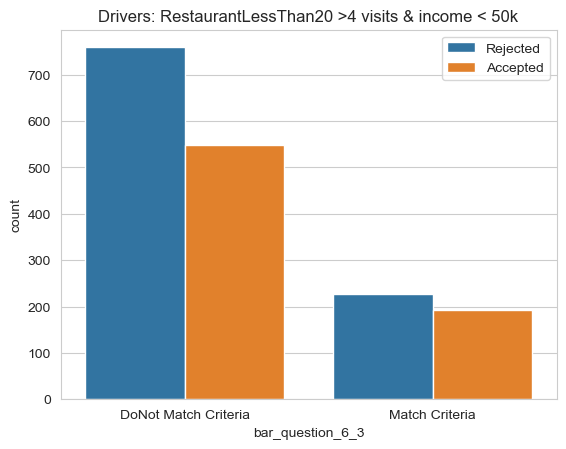

In [322]:
# Clean and convert income data to integers
income_replacements = {
    'Less than $12500': '0 - 12500',
    '$100000 or More': '100001 - inf'
}

# Replace income ranges with numeric values
for key, value in income_replacements.items():
    bar_data['income'] = bar_data['income'].str.replace(key, value, regex=False)

# Extract the upper bound of income ranges and convert to float
bar_data['income_max'] = bar_data['income'].str.extract(r'(\d+)$').astype(float)

# Fill NaN values with a default (e.g., 0 or another appropriate value)
bar_data['income_max'].fillna(0, inplace=True)

# Convert to integer after filling NaNs
bar_data['income_max'] = bar_data['income_max'].astype(int)

# Create 'bar_question_6_3' column for specific criteria
bar_data['bar_question_6_3'] = 0  # Initialize with 0
bar_data.loc[
    (bar_data['RestaurantLessThan20'].isin(['gt8', '4~8'])) &
    (bar_data['income_max'] < 50000),
    'bar_question_6_3'
] = 1

# Plot acceptance rates for 'bar_question_6_3'
sns.countplot(data=bar_data, x='bar_question_6_3', hue='Y')
plt.title('Drivers: RestaurantLessThan20 >4 visits & income < 50k')
plt.xticks([0, 1], ['DoNot Match Criteria', 'Match Criteria'])
plt.legend(['Rejected', 'Accepted'])
plt.show()

answer 2.6.3 : drivers who go to cheap restaurants more than 4 times a month and income is less than 50K are MORE likely to accept the coupon which is the DIFFERENT behaviour for other drivers

In [323]:
# Convert necessary columns to numeric if applicable, or exclude non-numeric columns
numeric_data = bar_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                   temperature       age  has_children  toCoupon_GEQ5min  \
temperature           1.000000 -0.021820     -0.109408               NaN   
age                  -0.021820  1.000000      0.429497               NaN   
has_children         -0.109408  0.429497      1.000000               NaN   
toCoupon_GEQ5min           NaN       NaN           NaN               NaN   
toCoupon_GEQ15min    -0.171031  0.028624      0.080895               NaN   
toCoupon_GEQ25min    -0.260175 -0.009119      0.006244               NaN   
direction_same       -0.004292  0.002656     -0.009146               NaN   
direction_opp         0.004292 -0.002656      0.009146               NaN   
Y                     0.068013 -0.103512     -0.194189               NaN   
bar_visits            0.054593 -0.148025     -0.214386               NaN   
age_int              -0.021820  1.000000      0.429497               NaN   
bar_question_5        0.142830 -0.090201     -0.157144               NaN   
bar_question

conclution on drivers who accepted Bar Coupon is as follows:
1. More the visits to bar, higher the chances of accepting coupon
2. Accepting bar coupon increases as age increase
3. drivers who have visited a bar more than once and are not alone or with kids and are not widowed are more likely to accept the coupon
4. drivers who go to cheap restaurants more than 4 times a month and income is less than 50K are more likely to accept the coupon similar to other drivers


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Some preprocessing of data

In [324]:

# create age_int column with age as integer value from age column
cleaned_data['age_int'] = cleaned_data['age']
# replace string "plus" with empty string in age_int column
cleaned_data['age_int'] = cleaned_data['age_int'].str.replace('plus', '')
cleaned_data['age_int'] = cleaned_data['age_int'].str.replace('below21', '20')
# convert age_int column to integer
cleaned_data['age_int'] = cleaned_data['age_int'].astype(int)
cleaned_data['age_int'].value_counts()

age_int
21    2642
26    2548
31    2019
50    1781
36    1317
41    1089
46     670
20     544
Name: count, dtype: int64

In [335]:
# Create a new column 'income_max' from the 'income' column
cleaned_data['income_max'] = cleaned_data['income']

# Replace specific income ranges with numeric equivalents
cleaned_data['income_max'] = cleaned_data['income_max'].str.replace('Less than $12500', '0 - 12500', regex=False)
cleaned_data['income_max'] = cleaned_data['income_max'].str.replace('$100000 or More', '100001 - inf', regex=False)

# Remove dollar signs
cleaned_data['income_max'] = cleaned_data['income_max'].str.replace('$', '', regex=False)

# Extract the upper bound of the income range
cleaned_data['income_max'] = cleaned_data['income_max'].apply(lambda x: x.split(' - ')[1])

# Convert 'income_max' to integer
cleaned_data['income_max'] = pd.to_numeric(cleaned_data['income_max'], errors='coerce')

# Display value counts for 'income_max'
print(cleaned_data['income_max'].value_counts())

income_max
37499.0    2006
24999.0    1825
49999.0    1795
inf        1717
62499.0    1655
12500.0    1034
99999.0     879
87499.0     856
74999.0     843
Name: count, dtype: int64


3.1 question : what marital status is most likely to accept the offer?

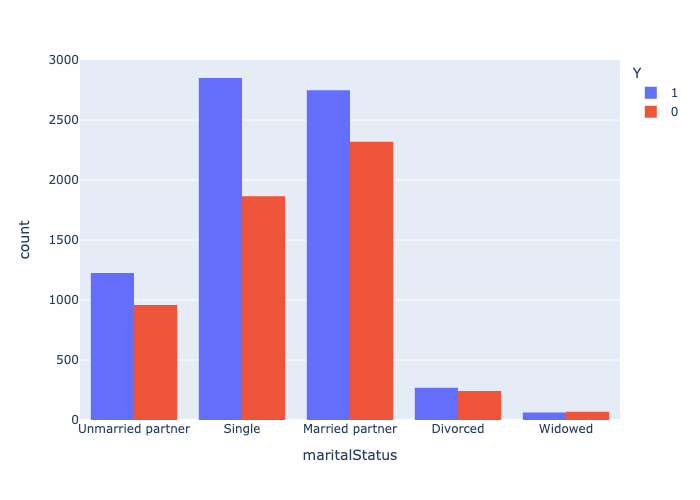

In [336]:
fig = px.histogram(cleaned_data, x="maritalStatus", color="Y", barmode="group")
fig.show('png')

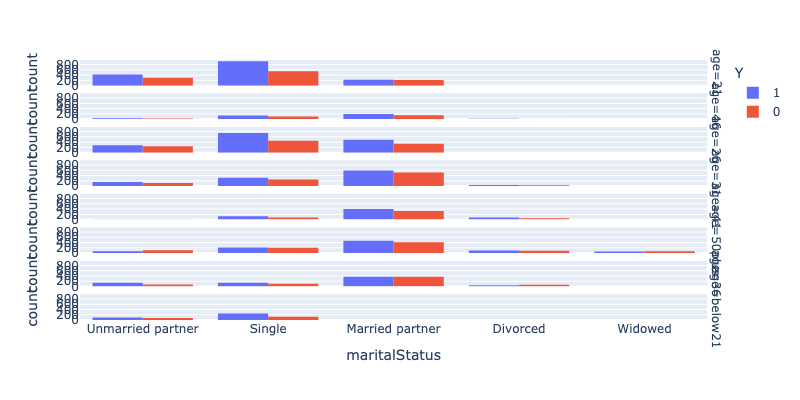

In [337]:
fig = px.histogram(data_frame = cleaned_data
             ,x = 'maritalStatus'
             ,facet_row = 'age',
             color="Y", barmode="group",
             width=800, height=400
             )
fig.show('png')

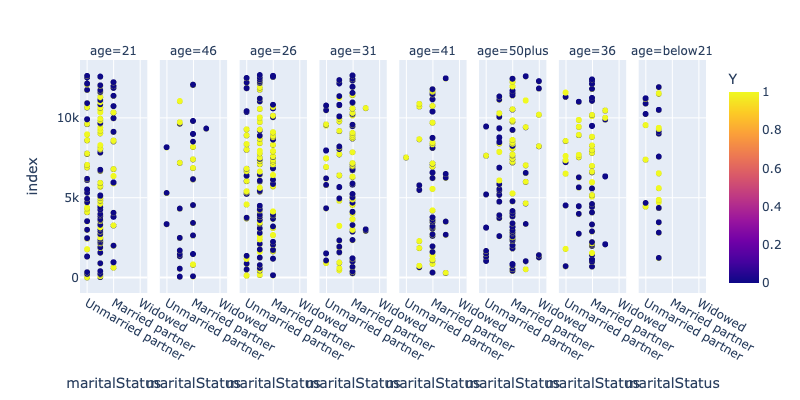

In [338]:
fig = px.scatter(cleaned_data, x="maritalStatus", color="Y", facet_col="age",
                 width=800, height=400)
fig.show('png')

3.1 answer : single people are most likely to accept the offer compared to any other g

3.2 : What maritalStatus under age 30 accepts more coupon

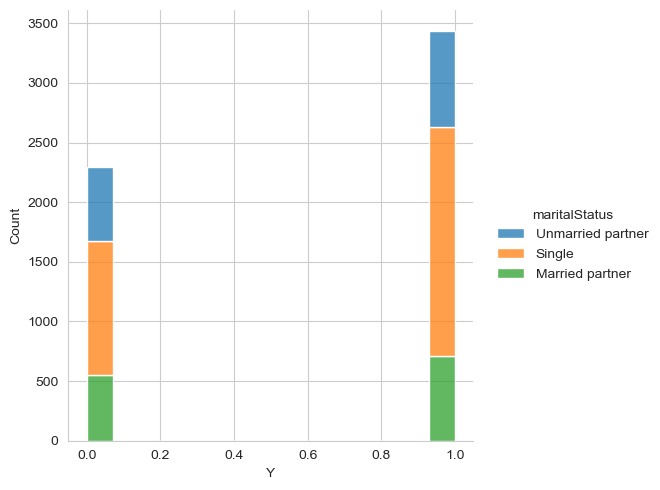

In [339]:
sns.displot(data = cleaned_data.query('age_int < 30'), x = 'Y', hue = 'maritalStatus', multiple = 'stack')
plt.show()

3.2 Answer : Single status drives accept more coupons under age 30

3.3 Plot charts on type of coupons. Which has higher acceptance rate?

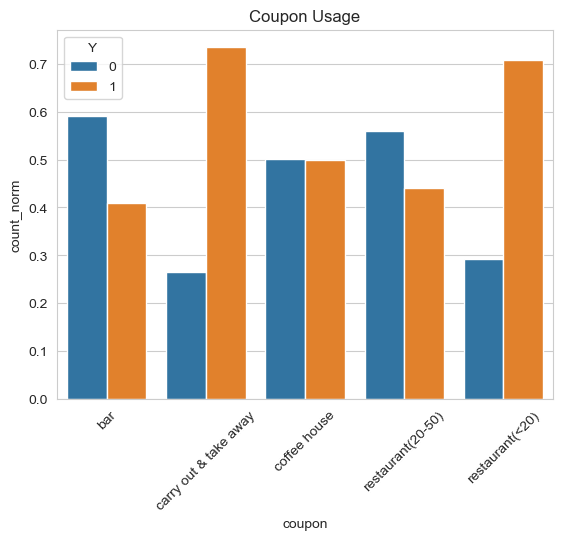

In [340]:
coupon_norm = (cleaned_data.groupby(['coupon', 'Y']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count')).sort_values(by =["coupon", "Y"])
coupon_norm

# create a column in coupon_norm with normalized count column for each coupon
coupon_norm['count_norm'] = coupon_norm.groupby('coupon')['count'].transform(lambda x: x/x.sum())
coupon_norm


sns.barplot(data=coupon_norm, x='coupon', y='count_norm', hue='Y')
plt.title('Coupon Usage')
plt.xticks(rotation=45)
plt.show()

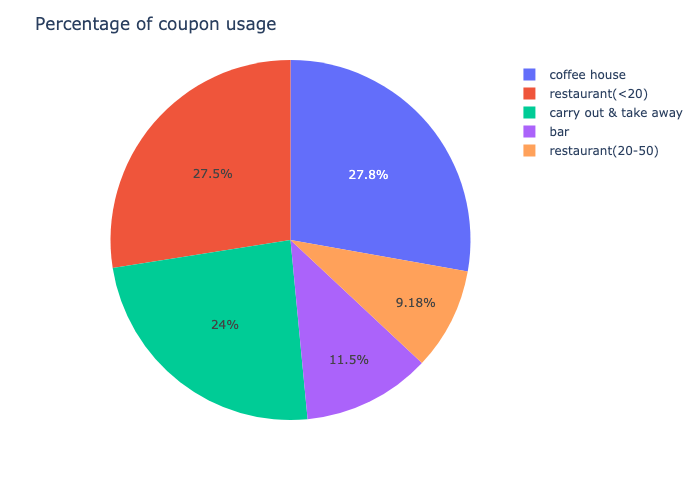

In [341]:
fig = px.pie(cleaned_data, values='Y', names='coupon')
fig.update_layout(title_text='Percentage of coupon usage')
fig.show('png')

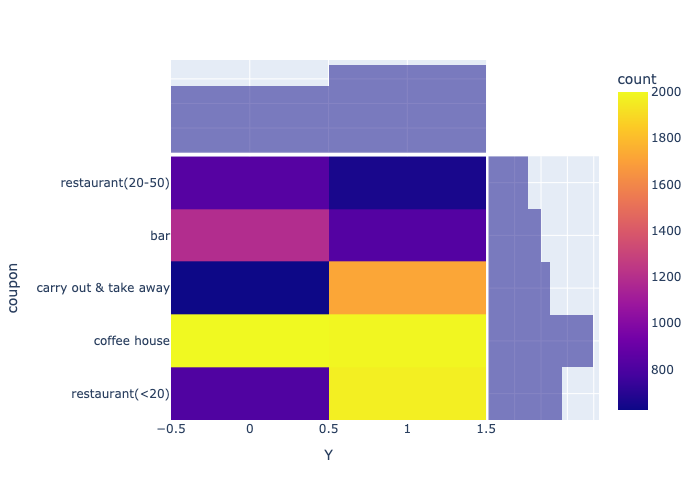

In [342]:
fig = px.density_heatmap(cleaned_data, x="Y", y="coupon", marginal_x="histogram", marginal_y="histogram")
fig.show('png')

3.3 answer : This shows Carry out and take away has the highest acceptance rate compared to any other coupon type. 2nd is Restaurant(<20).

3.4 What are the different vehicles proportion based on car column? any comparision with education?

In [343]:
print(cleaned_data['car'].count())
print(cleaned_data['car'].value_counts())
known_car_sum = cleaned_data.query("car != 'unknown'")['car'].count()
print('total known car valuse :', known_car_sum)
print('percentage of valid car details :', (100*known_car_sum/cleaned_data['car'].count()), '%')

12610
car
Mazda5                                      12524
Scooter and motorcycle                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64
total known car valuse : 12610
percentage of valid car details : 100.0 %


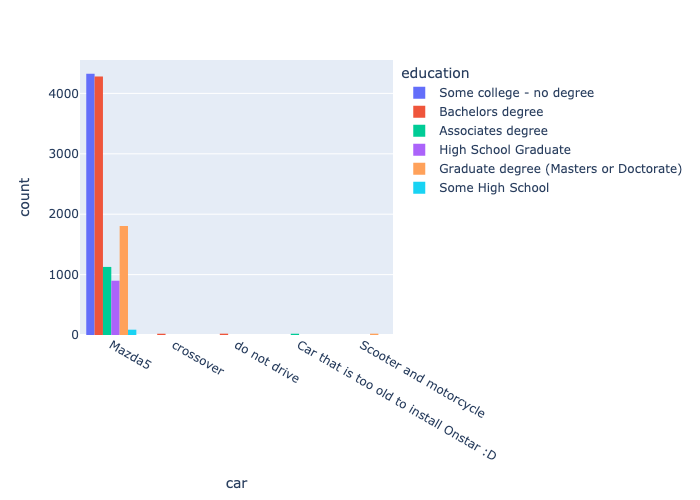

In [344]:
fig = px.histogram(cleaned_data.query("car != 'unknown'"), x="car", color="education", barmode="group")
fig.show('png')

most people drive mazda

3.5 Explain correlation between income and occupation of drivers

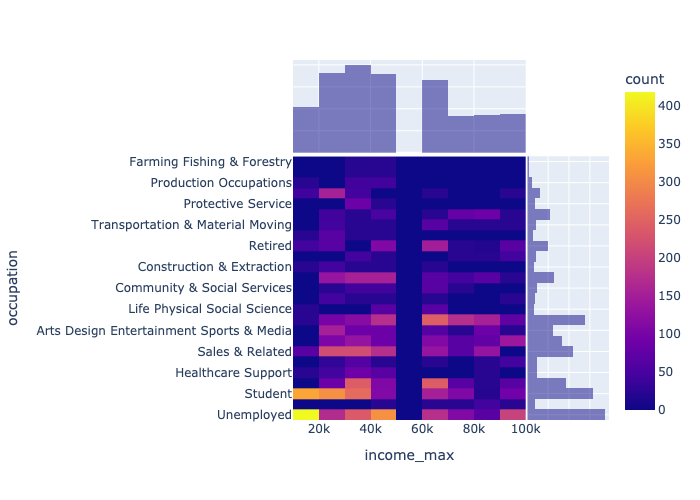

In [345]:
fig = px.density_heatmap(cleaned_data, x="income_max", y="occupation", marginal_x="histogram", marginal_y="histogram")
fig.show('png')

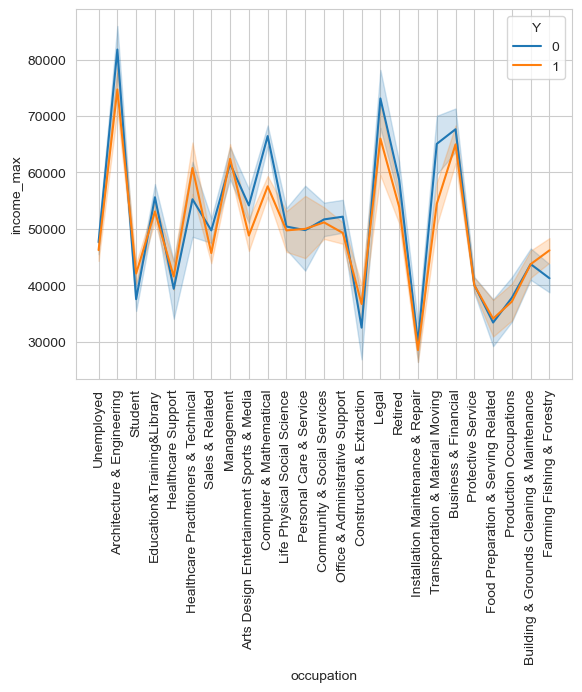

In [346]:
# px.histogram(cleaned_data, x="income_max", y="occupation", color="Y", barmode="group")


# fig.show('png')
sns.lineplot(x='occupation',
            y="income_max",
            hue="Y",
            data=cleaned_data)
plt.xticks(rotation=90)
plt.show()

In [347]:
occ_norm = (cleaned_data.groupby(['occupation', 'Y']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count')).sort_values(by =["occupation", "Y"])
occ_norm

# create a column in occ_norm with normalized count column for each occupation
occ_norm['count_norm'] = occ_norm.groupby('occupation')['count'].transform(lambda x: x/x.sum())
occ_norm
# occ_norm.describe()

occupation  Y  count  count_norm
41                 Architecture & Engineering  0     64    0.365714
29                 Architecture & Engineering  1    111    0.634286
15   Arts Design Entertainment Sports & Media  0    303    0.483254
13   Arts Design Entertainment Sports & Media  1    324    0.516746
49  Building & Grounds Cleaning & Maintenance  0     18    0.409091
46  Building & Grounds Cleaning & Maintenance  1     26    0.590909
18                       Business & Financial  0    234    0.430939
14                       Business & Financial  1    309    0.569061
25                Community & Social Services  0    123    0.514644
27                Community & Social Services  1    116    0.485356
6                     Computer & Mathematical  0    603    0.433813
3                     Computer & Mathematical  1    787    0.566187
44                  Construction & Extraction  0     48    0.311688
30                  Construction & Extraction  1    106    0.688312
10                 Education&Training&Library  0    449    0.478168
7                  Education&Training&Library  1    490    0.521832
48                 Farming Fishing & Forestry  0     20    0.465116
47                 Farming Fishing & Forestry  1     23    0.534884
24         Food Preparation & Serving Related  0    124    0.416107
20         Food Preparation & Serving Related  1    174    0.583893
36       Healthcare Practitioners & Technical  0     79    0.323770
22       Healthcare Practitioners & Technical  1    165    0.676230
37                         Healthcare Support  0     73    0.301653
21                         Healthcare Support  1    169    0.698347
43          Installation Maintenance & Repair  0     62    0.466165
38          Installation Maintenance & Repair  1     71    0.533835
26                                      Legal  0    116    0.529680
31                                      Legal  1    103    0.470320
39               Life Physical Social Science  0     71    0.420118
32               Life Physical Social Science  1     98    0.579882
12                                 Management  0    340    0.414129
8                                  Management  1    481    0.585871
17            Office & Administrative Support  0    255    0.399687
11            Office & Administrative Support  1    383    0.600313
35                    Personal Care & Service  0     79    0.451429
33                    Personal Care & Service  1     96    0.548571
45                     Production Occupations  0     41    0.379630
40                     Production Occupations  1     67    0.620370
42                         Protective Service  0     62    0.356322
28                         Protective Service  1    112    0.643678
16                                    Retired  0    268    0.543611
19                                    Retired  1    225    0.456389
9                             Sales & Related  0    476    0.437500
5                             Sales & Related  1    612    0.562500
4                                     Student  0    615    0.390476
1                                     Student  1    960    0.609524
34           Transportation & Material Moving  0     88    0.403670
23           Transportation & Material Moving  1    130    0.596330
2                                  Unemployed  0    842    0.452445
0                                  Unemployed  1   1019    0.547555

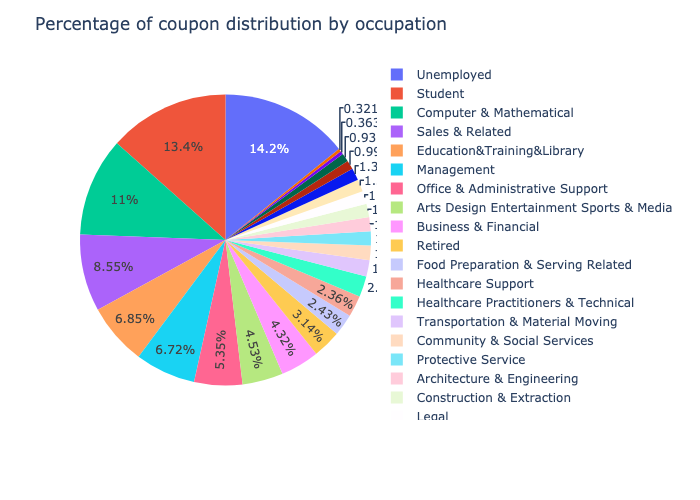

In [348]:
fig = px.pie(cleaned_data, values='Y', names='occupation')
fig.update_layout(title_text='Percentage of coupon distribution by occupation')
fig.show('png')

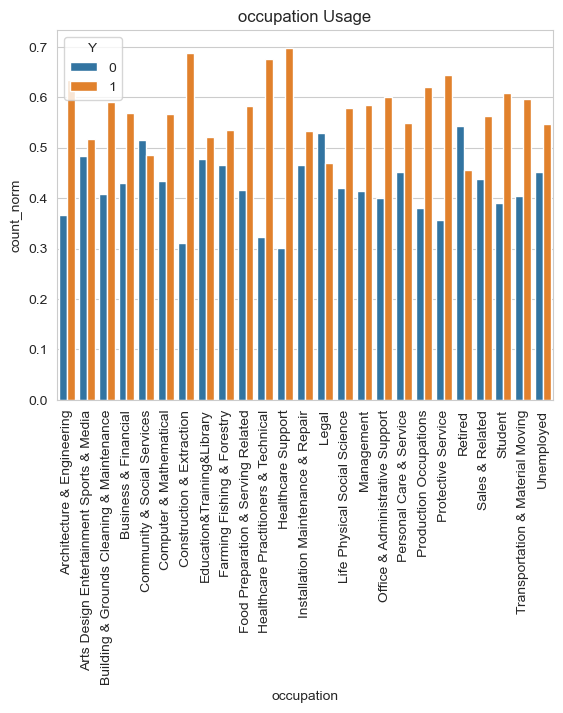

In [349]:
sns.barplot(data=occ_norm, x='occupation', y='count_norm', hue='Y')
plt.title('occupation Usage')
plt.xticks(rotation=90)
plt.show()

Overall conclution :
Overall 58% of drivers accept coupons
"Bar" Coupons are accepted more during 55º temperature
More the bar visits, higher the acceptance of bar coupon (77% acceptance opposed to drivers who have not been i.e. 37%
Higher the age and have visited bar, more likly they accept bar coupons
Singles accept more coupon than any other marital status
Carry out and take away has the highest acceptance rate compared to any other coupon type. 2nd is Restaurant(<20).
Coffee House has th maximum number of data.
less than 1% (0.85%) of drivers have provided car/driving details
Architecture & Engineering has highest number of count
Healthcare Support has the highest acceptance rate with 69.8347% compared to any other job
Retired job type has highest rejection rate with 54.1414%
Next Steps and Recommendations
Try to gather more data of car/vehical, that might provide more insights
Provide bar coupon based on weather conditions
Come up with geo-locations bassed on profession so that coupons are more targeted by driver professions
Restaurant(<20) has the second highest acceptane rate, provide more of that coupon